In [1]:
'''
Created on Dec, 2016

@author: hugo

'''
from __future__ import absolute_import

import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate


class neural_net_visualizer(object):
    def __init__(self):
        pass



def heatmap(data, save_file='heatmap.png'):
    ax = plt.figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MultipleLocator(5))
    plt.pcolor(data, cmap=plt.cm.jet)
    plt.savefig(save_file)
    # plt.show()

def word_cloud(word_embedding_matrix, vocab, s, save_file='scatter.png'):
    words = [(i, vocab[i]) for i in s]
    model = TSNE(n_components=2, random_state=0)
    #Note that the following line might use a good chunk of RAM
    tsne_embedding = model.fit_transform(word_embedding_matrix)
    words_vectors = tsne_embedding[np.array([item[1] for item in words])]

    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(
        words_vectors[:, 0], words_vectors[:, 1], marker='o', cmap=plt.get_cmap('Spectral'))

    for label, x, y in zip(s, words_vectors[:, 0], words_vectors[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            fontsize=20,
            # bbox=dict(boxstyle='round,pad=1.', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '<-', connectionstyle='arc3,rad=0')
            )
    plt.show()
    # plt.savefig(save_file)

def plot_tsne(doc_codes, doc_labels, classes_to_visual, save_file):
    # markers = ["D", "p", "*", "s", "d", "8", "^", "H", "v", ">", "<", "h", "|"]
    markers = ["o", "v", "8", "s", "p", "*", "h", "H", "+", "x", "D"]
    plt.rc('legend',**{'fontsize':30})
    classes_to_visual = list(set(classes_to_visual))
    C = len(classes_to_visual)
    while True:
        if C <= len(markers):
            break
        markers += markers

    class_ids = dict(zip(classes_to_visual, range(C)))

    if isinstance(doc_codes, dict) and isinstance(doc_labels, dict):
        codes, labels = zip(*[(code, doc_labels[doc]) for doc, code in doc_codes.items() if doc_labels[doc] in classes_to_visual])
    else:
        codes, labels = doc_codes, doc_labels

    X = np.r_[list(codes)]
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
    np.set_printoptions(suppress=True)
    X = tsne.fit_transform(X)

    plt.figure(figsize=(10, 10), facecolor='white')

    for c in classes_to_visual:
        idx = np.array(labels) == c
        # idx = get_indices(labels, c)
        plt.plot(X[idx, 0], X[idx, 1], linestyle='None', alpha=1, marker=markers[class_ids[c]],
                        markersize=10, label=c)
    legend = plt.legend(loc='upper right', shadow=True)
    # plt.title("tsne")
    # plt.savefig(save_file)
    plt.savefig(save_file, format='eps', dpi=2000)
    plt.show()


def plot_tsne_3d(doc_codes, doc_labels, classes_to_visual, save_file, maker_size=None, opaque=None):
    markers = ["D", "p", "*", "s", "d", "8", "^", "H", "v", ">", "<", "h", "|"]
    plt.rc('legend',**{'fontsize':20})
    colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
    C = len(classes_to_visual)
    while True:
        if C <= len(markers):
            break
        markers += markers
    while True:
        if C <= len(colors):
            break
        colors += colors

    class_ids = dict(zip(classes_to_visual, range(C)))

    if isinstance(doc_codes, dict) and isinstance(doc_labels, dict):
        codes, labels = zip(*[(code, doc_labels[doc]) for doc, code in doc_codes.items() if doc_labels[doc] in classes_to_visual])
    else:
        codes, labels = doc_codes, doc_labels

    X = np.r_[list(codes)]
    tsne = TSNE(perplexity=30, n_components=3, init='pca', n_iter=5000)
    np.set_printoptions(suppress=True)
    X = tsne.fit_transform(X)

    fig = plt.figure(figsize=(10, 10), facecolor='white')
    ax = fig.add_subplot(111, projection='3d')

    # The problem is that the legend function don't support the type returned by a 3D scatter.
    # So you have to create a "dummy plot" with the same characteristics and put those in the legend.
    scatter_proxy = []
    for i in range(C):
        cls = classes_to_visual[i]
        idx = np.array(labels) == cls
        ax.scatter(X[idx, 0], X[idx, 1], X[idx, 2], c=colors[i], alpha=opaque[i] if opaque else 1, s=maker_size[i] if maker_size else 20, marker=markers[i], label=cls)
        scatter_proxy.append(mpl.lines.Line2D([0],[0], linestyle="none", c=colors[i], marker=markers[i], label=cls))
    ax.legend(scatter_proxy, classes_to_visual, numpoints=1)
    plt.savefig(save_file)
    plt.show()


def visualize_pca_2d(doc_codes, doc_labels, classes_to_visual, save_file):
    """
        Visualize the input data on a 2D PCA plot. Depending on the number of components,
        the plot will contain an X amount of subplots.
        @param doc_codes:
        @param number_of_components: The number of principal components for the PCA plot.
    """
    # markers = ["D", "p", "*", "s", "d", "8", "^", "H", "v", ">", "<", "h", "|"]
    markers = ["o", "v", "8", "s", "p", "*", "h", "H", "+", "x", "D"]
    plt.rc('legend',**{'fontsize':28})
    classes_to_visual = list(set(classes_to_visual))
    C = len(classes_to_visual)
    while True:
        if C <= len(markers):
            break
        markers += markers

    class_ids = dict(zip(classes_to_visual, range(C)))

    if isinstance(doc_codes, dict) and isinstance(doc_labels, dict):
        codes, labels = zip(*[(code, doc_labels[doc]) for doc, code in doc_codes.items() if doc_labels[doc] in classes_to_visual])
    else:
        codes, labels = doc_codes, doc_labels

    X = np.r_[list(codes)]
    X = PCA(n_components=3).fit_transform(X)
    plt.figure(figsize=(10, 10), facecolor='white')

    x_pc, y_pc = 1, 2

    for c in classes_to_visual:
        idx = np.array(labels) == c
        # idx = get_indices(labels, c)
        plt.plot(X[idx, x_pc], X[idx, y_pc], linestyle='None', alpha=1, marker=markers[class_ids[c]],
                        markersize=10, label=c)
        # plt.legend(c)
    # plt.title('Projected on the PCA components')
    # plt.xlabel('PC %s' % x_pc)
    # plt.ylabel('PC %s' % y_pc)
    legend = plt.legend(loc='upper right', shadow=True)
    # plt.savefig(save_file)
    plt.savefig(save_file, format='eps', dpi=2000)
    plt.show()

def visualize_pca_3d(doc_codes, doc_labels, classes_to_visual, save_file, maker_size=None, opaque=None):
    """
        Visualize the input data on a 2D PCA plot. Depending on the number of components,
        the plot will contain an X amount of subplots.
        @param doc_codes:
        @param number_of_components: The number of principal components for the PCA plot.
    """
    markers = ["D", "p", "*", "s", "d", "8", "^", "H", "v", ">", "<", "h", "|"]
    plt.rc('legend',**{'fontsize':20})
    colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
    C = len(classes_to_visual)
    while True:
        if C <= len(markers):
            break
        markers += markers
    while True:
        if C <= len(colors):
            break
        colors += colors

    if isinstance(doc_codes, dict) and isinstance(doc_labels, dict):
        codes, labels = zip(*[(code, doc_labels[doc]) for doc, code in doc_codes.items() if doc_labels[doc] in classes_to_visual])
    else:
        codes, labels = doc_codes, doc_labels

    X = np.r_[list(codes)]
    X = PCA(n_components=3).fit_transform(X)
    fig = plt.figure(figsize=(10, 10), facecolor='white')
    ax = fig.add_subplot(111, projection='3d')
    x_pc, y_pc, z_pc = 0, 1, 2

    # The problem is that the legend function don't support the type returned by a 3D scatter.
    # So you have to create a "dummy plot" with the same characteristics and put those in the legend.
    scatter_proxy = []
    for i in range(C):
        cls = classes_to_visual[i]
        idx = np.array(labels) == cls
        ax.scatter(X[idx, x_pc], X[idx, y_pc], X[idx, z_pc], c=colors[i], alpha=opaque[i] if opaque else 1, s=maker_size[i] if maker_size else 20, marker=markers[i], label=cls)
        scatter_proxy.append(mpl.lines.Line2D([0],[0], linestyle="none", c=colors[i], marker=markers[i], label=cls))
    ax.legend(scatter_proxy, classes_to_visual, numpoints=1)
    # plt.title('Projected on the PCA components')
    ax.set_xlabel('%sst component' % (x_pc + 1), fontsize=14)
    ax.set_ylabel('%snd component' % (y_pc + 1), fontsize=14)
    ax.set_zlabel('%srd component' % (z_pc + 1), fontsize=14)
    plt.savefig(save_file)
    plt.show()

def DBN_plot_tsne(doc_codes, doc_labels, classes_to_visual, save_file):
    markers = ["o", "v", "8", "s", "p", "*", "h", "H", "+", "x", "D"]

    C = len(classes_to_visual)
    while True:
        if C <= len(markers):
            break
        markers += markers

    class_ids = dict(zip(classes_to_visual.keys(), range(C)))

    codes, labels = doc_codes, doc_labels

    X = np.r_[list(codes)]
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
    np.set_printoptions(suppress=True)
    X = tsne.fit_transform(X)

    plt.figure(figsize=(10, 10), facecolor='white')

    for c in classes_to_visual.keys():
        idx = np.array(labels) == c
        # idx = get_indices(labels, c)
        plt.plot(X[idx, 0], X[idx, 1], linestyle='None', alpha=0.6, marker=markers[class_ids[c]],
                        markersize=6, label=classes_to_visual[c])
    legend = plt.legend(loc='upper center', shadow=True)
    plt.title("tsne")
    plt.savefig(save_file)
    plt.show()

def DBN_visualize_pca_2d(doc_codes, doc_labels, classes_to_visual, save_file):
    """
        Visualize the input data on a 2D PCA plot. Depending on the number of components,
        the plot will contain an X amount of subplots.
        @param doc_codes:
        @param number_of_components: The number of principal components for the PCA plot.
    """

    # markers = ["p", "s", "h", "H", "+", "x", "D"]
    markers = ["o", "v", "8", "s", "p", "*", "h", "H", "+", "x", "D"]

    C = len(classes_to_visual)
    while True:
        if C <= len(markers):
            break
        markers += markers

    class_ids = dict(zip(classes_to_visual.keys(), range(C)))

    codes, labels = doc_codes, doc_labels

    X = np.r_[list(codes)]
    X = PCA(n_components=3).fit_transform(X)
    plt.figure(figsize=(10, 10), facecolor='white')

    x_pc, y_pc = 1, 2

    for c in classes_to_visual.keys():
        idx = np.array(labels) == c
        # idx = get_indices(labels, c)
        plt.plot(X[idx, x_pc], X[idx, y_pc], linestyle='None', alpha=0.6, marker=markers[class_ids[c]],
                        markersize=6, label=classes_to_visual[c])
        # plt.legend(c)
    plt.title('Projected on the first 2 PCs')
    plt.xlabel('PC %s' % x_pc)
    plt.ylabel('PC %s' % y_pc)
    # legend = plt.legend(loc='upper center', shadow=True)
    plt.savefig(save_file)
    plt.show()


def reuters_visualize_tsne(doc_codes, doc_labels, classes_to_visual, save_file):
    """
        Visualize the input data on a 2D PCA plot. Depending on the number of components,
        the plot will contain an X amount of subplots.
        @param doc_codes:
        @param number_of_components: The number of principal components for the PCA plot.
    """

    # markers = ["p", "s", "h", "H", "+", "x", "D"]
    markers = ["o", "v", "8", "s", "p", "*", "h", "H", "+", "x", "D"]

    C = len(classes_to_visual)
    while True:
        if C <= len(markers):
            break
        markers += markers

    class_names = classes_to_visual.keys()
    class_ids = dict(zip(class_names, range(C)))
    class_names = set(class_names)
    codes, labels = zip(*[(code, doc_labels[doc]) for doc, code in doc_codes.items() if class_names.intersection(set(doc_labels[doc]))])

    X = np.r_[list(codes)]
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
    np.set_printoptions(suppress=True)
    X = tsne.fit_transform(X)

    plt.figure(figsize=(10, 10), facecolor='white')

    for c in classes_to_visual.keys():
        idx = get_indices(labels, c)
        plt.plot(X[idx, 0], X[idx, 1], linestyle='None', alpha=0.6, marker=markers[class_ids[c]],
                        markersize=6, label=classes_to_visual[c])
    legend = plt.legend(loc='upper center', shadow=True)
    plt.title("tsne")
    plt.savefig(save_file)
    plt.show()

def reuters_visualize_pca_2d(doc_codes, doc_labels, classes_to_visual, save_file):
    """
        Visualize the input data on a 2D PCA plot. Depending on the number of components,
        the plot will contain an X amount of subplots.
        @param doc_codes:
        @param number_of_components: The number of principal components for the PCA plot.
    """

    # markers = ["p", "s", "h", "H", "+", "x", "D"]
    markers = ["o", "v", "8", "s", "p", "*", "h", "H", "+", "x", "D"]

    C = len(classes_to_visual)
    while True:
        if C <= len(markers):
            break
        markers += markers

    class_names = classes_to_visual.keys()
    class_ids = dict(zip(class_names, range(C)))
    class_names = set(class_names)
    codes, labels = zip(*[(code, class_names.intersection(set(doc_labels[doc]))) for doc, code in doc_codes.items() if len(class_names.intersection(set(doc_labels[doc]))) == 1])
    # codes = []
    # labels = []
    # for doc, code in doc_codes.items():
    #     y = set(doc_labels[doc])
    #     x = list(class_names.intersection(y))
    #     if x:
    #         codes.append(code)
    #         labels.append(x[0])
    # x = 0
    # pairs = []
    # for each in labels:
    #     if len(class_names.intersection(set(each))) > 1:
    #         x += 1
    #         pairs.append(class_names.intersection(set(each)))
    # print x


    X = np.r_[list(codes)]
    X = PCA(n_components=3).fit_transform(X)
    plt.figure(figsize=(10, 10), facecolor='white')

    x_pc, y_pc = 0, 1

    for c in class_names:
        idx = get_indices(labels, c)
        plt.plot(X[idx, x_pc], X[idx, y_pc], linestyle='None', alpha=0.6, marker=markers[class_ids[c]],
                        markersize=6, label=classes_to_visual[c])
        # plt.legend(c)
    plt.title('Projected on the first 2 PCs')
    plt.xlabel('PC %s' % x_pc)
    plt.ylabel('PC %s' % y_pc)
    legend = plt.legend(loc='upper center', shadow=True)
    plt.savefig(save_file)
    plt.show()

def get_indices(labels, c):
    idx = np.zeros(len(labels), dtype=bool)
    for i in range(len(labels)):
        tmp = [labels[i]] if not isinstance(labels[i], (list, set)) else labels[i]
        if c in tmp:
            idx[i] = True
    return idx

def plot_info_retrieval(precisions, save_file):
    # markers = ["|", "D", "8", "v", "^", ">", "h", "H", "s", "*", "p", "d", "<"]
    markers = ["D", "p", 's', "*", "d", "8", "^", "H", "v", ">", "<", "h", "|"]
    ticks = zip(*zip(*precisions)[1][0])[0]
    plt.xticks(range(len(ticks)), ticks)
    new_x = interpolate.interp1d(ticks, range(len(ticks)))(ticks)

    i = 0
    for model_name, val in precisions:
        fr, pr = zip(*val)
        plt.plot(new_x, pr, linestyle='-', alpha=0.7, marker=markers[i],
                        markersize=8, label=model_name)
        i += 1
        # plt.legend(model_name)
    plt.xlabel('Fraction of Retrieved Documents')
    plt.ylabel('Precision')
    legend = plt.legend(loc='upper right', shadow=True)
    plt.savefig(save_file)
    plt.show()

def plot_info_retrieval_by_length(precisions, save_file):
    markers = ["o", "v", "8", "s", "p", "*", "h", "H", "^", "x", "D"]
    ticks = zip(*zip(*precisions)[1][0])[0]
    plt.xticks(range(len(ticks)), ticks)
    new_x = interpolate.interp1d(ticks, range(len(ticks)))(ticks)

    i = 0
    for model_name, val in precisions:
        fr, pr = zip(*val)
        plt.plot(new_x, pr, linestyle='-', alpha=0.6, marker=markers[i],
                        markersize=6, label=model_name)
        i += 1
        # plt.legend(model_name)
    plt.xlabel('Document Sorted by Length')
    plt.ylabel('Precision (%)')
    legend = plt.legend(loc='upper right', shadow=True)
    plt.savefig(save_file)
    plt.show()

def plot(x, y, x_label, y_label, save_file):
    ticks = x
    plt.xticks(range(len(ticks)), ticks, fontsize = 15)
    plt.yticks(fontsize = 15)
    new_x = interpolate.interp1d(ticks, range(len(ticks)))(ticks)

    plt.plot(new_x, y, linestyle='-', alpha=1.0, markersize=12, marker='p', color='b')
    plt.xlabel(x_label, fontsize=24)
    plt.ylabel(y_label, fontsize=20)
    plt.savefig(save_file)
    plt.show()

In [2]:
from Models import *
from Utils import *
from FastModels import *
import warnings
from livelossplot import PlotLossesKeras
# warnings.filterwarnings('ignore')

from gensim.models import KeyedVectors
import sentencepiece as spm

max_len = 15
enablePadding = True

sp = spm.SentencePieceProcessor()
sp.Load('/work/data/bpe/en.wiki.bpe.op50000.model')
bpe = KeyedVectors.load_word2vec_format("/work/data/bpe/en.wiki.bpe.op50000.d200.w2v.bin", binary=True)
bpe.index2word = [''] + bpe.index2word + ['<sos>'] + ['<eos>']  # add empty string 
nb_words = len(bpe.index2word)
# word2index
bpe_dict = {bpe.index2word[i]: i for i in range(len(bpe.index2word))}
# construct embedding_matrix
embedding_matrix = np.concatenate([np.zeros((1, bpe.vector_size)), bpe.vectors, np.zeros((2, bpe.vector_size))]) # add zero vector for empty string (i.e. used for padding)

embedding_layer = Embedding(nb_words,
                    embedding_matrix.shape[-1],
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=True)

Using TensorFlow backend.


In [15]:
df = pd.read_csv("/work/data/train_data/30M_QD_lower2.txt", nrows=1000, names=["label", "q", "d"], sep="\t", header=None, error_bad_lines=False)
enablePadding = True
q_df = parse_texts_bpe(df.q.tolist(), sp, bpe_dict, max_len, enablePadding)
d_df = parse_texts_bpe(df.d.tolist(), sp, bpe_dict, max_len, enablePadding)

In [16]:
w2v = Sequential([embedding_layer, GlobalMaxPooling1D()])

In [17]:
w2v.predict(q_df).shape

(1000, 200)

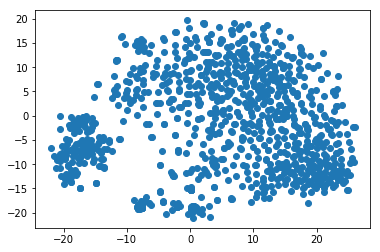

In [18]:
%matplotlib inline

X = w2v.predict(q_df)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

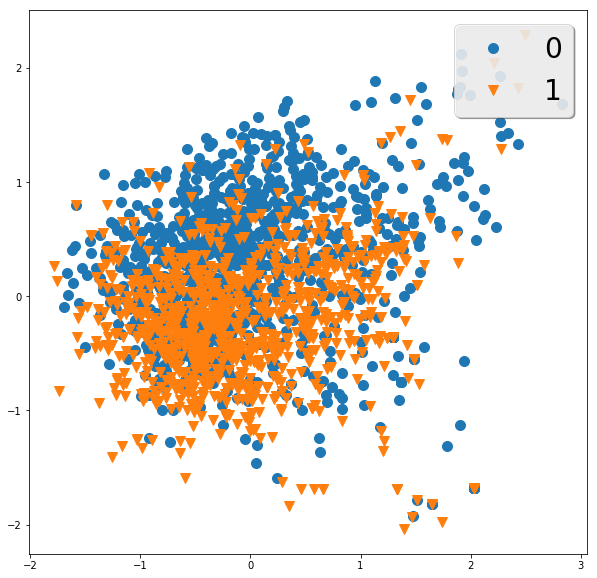

In [27]:
doc_codes = np.concatenate([w2v.predict(q_df), w2v.predict(d_df)])
doc_labels = np.array([0] * len(df) + [1] * len(df))
classes_to_visual = [0,1]
save_file = "test"
visualize_pca_2d(doc_codes, doc_labels, classes_to_visual, save_file)


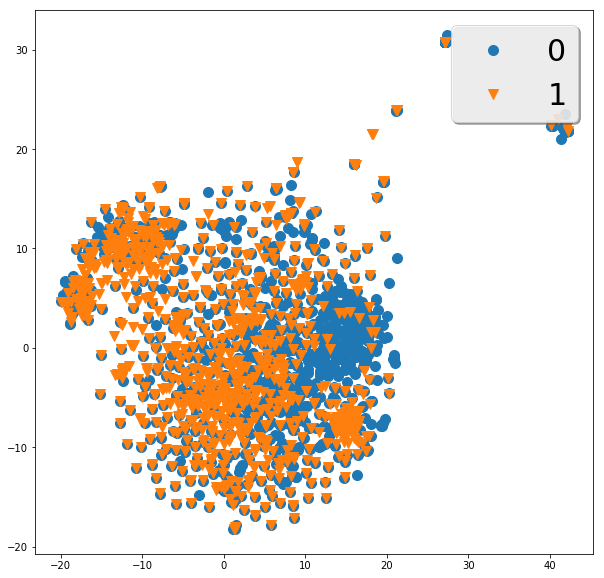

In [28]:
plot_tsne(doc_codes, doc_labels, classes_to_visual, save_file)